# Olympics Database
## PART 3 - More Exploratory analysis<br>PART 3 - Plus d'Analyse exploratoire
#### ENG<br>Start with importing the libraries needed<br>And then upload the data

#### FR<br>Commençons par importer les librairies que nous allons utiliser<br>Puis téléchargeons la base de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df_main = pd.read_csv('C:/Users/raflg/Downloads/Databases/summer_arranged2.csv', index_col=0)

df_main

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Medal_Bronze,...,Medal_count,Medal_count_year,Medal_count_medal,Medal_count_gender,Var_year,Var_gold,Var_men,Var_women,Var_medals,Var_gender
0,1980,Moscow,Aquatics,Diving,"AMBARTSUMYAN, David",RUS,Men,10M Platform,Bronze,509,...,1505,442,123,307,0.0,0.0,0.0,0.0,0.0,0.0
1,1980,Moscow,Aquatics,Diving,"ALEINIK, Vladimir",RUS,Men,10M Platform,Silver,509,...,1505,442,127,307,0.0,0.0,0.0,0.0,0.0,0.0
2,1980,Moscow,Aquatics,Diving,"TSOTADZE, Liana",RUS,Women,10M Platform,Bronze,509,...,1505,442,123,135,0.0,0.0,0.0,0.0,0.0,0.0
3,1980,Moscow,Aquatics,Diving,"EMIRZIAN, Servard",RUS,Women,10M Platform,Silver,509,...,1505,442,127,135,0.0,0.0,0.0,0.0,0.0,0.0
4,1980,Moscow,Aquatics,Diving,"CAGNOTTO, Giorgio Franco",ITA,Men,3M Springboard,Bronze,204,...,523,37,8,34,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882,2012,London,Wrestling,Wrestling Freestyle,"GUENOT, Steeve",FRA,Men,Wg 66 KG,Bronze,199,...,511,82,22,51,8.0,20.0,-23.0,210.0,-21.0,-23.0
7883,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold,509,...,1505,131,47,65,-8.0,9.0,3.0,-18.0,9.0,3.0
7884,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold,509,...,1505,131,47,65,-8.0,9.0,3.0,-18.0,9.0,3.0
7885,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,509,...,1505,131,33,65,-8.0,9.0,3.0,-18.0,-25.0,3.0


#### ENG<br>Compare Medals in Northen vs. Southern Hemisphere

#### FR<br>Comparons les médailles entre l'Hèmisphère Nord et Sud

In [3]:
df = df_main.copy()
df.City.unique()

array(['Moscow', 'Los Angeles', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Athens', 'Beijing', 'London'], dtype=object)

In [4]:
hemisphere_conditions = [(df['City'] == 'Athens') | (df['City'] == 'London') | (df['City'] == 'Los Angeles') | 
                         (df['City'] == 'Moscow') | (df['City'] == 'Barcelona') | (df['City'] == 'Atlanta') |
                         (df['City'] == 'Beijing'),
                         (df['City'] == 'Seoul') | (df['City'] == 'Sydney')]

hemisphere_results = ['Northern Hemisphere', 'Southern Hemisphere']

df['Hemisphere'] = np.select(hemisphere_conditions, hemisphere_results)

In [5]:
ctrs_gb = df.groupby('Country').count().sort_values(by='Medal', ascending=False)
top10 = ctrs_gb.index

In [6]:
df_hem = df.groupby(['Country', 'Hemisphere']).agg({'Medal' : 'count'})
df_hem

Medal
Country Hemisphere                
AUS     Northern Hemisphere    671
        Southern Hemisphere    217
FRA     Northern Hemisphere    416
        Southern Hemisphere     95
GBR     Northern Hemisphere    453
        Southern Hemisphere    108
GER     Northern Hemisphere    666
        Southern Hemisphere    119
HUN     Northern Hemisphere    242
        Southern Hemisphere     97
ITA     Northern Hemisphere    429
        Southern Hemisphere     94
NED     Northern Hemisphere    359
        Southern Hemisphere    123
RUS     Northern Hemisphere   1023
        Southern Hemisphere    482
SWE     Northern Hemisphere    158
        Southern Hemisphere     48
USA     Northern Hemisphere   1646
        Southern Hemisphere    441

Text(0.5, 1.0, 'Top 10 Countries Medals by Hemisphere')

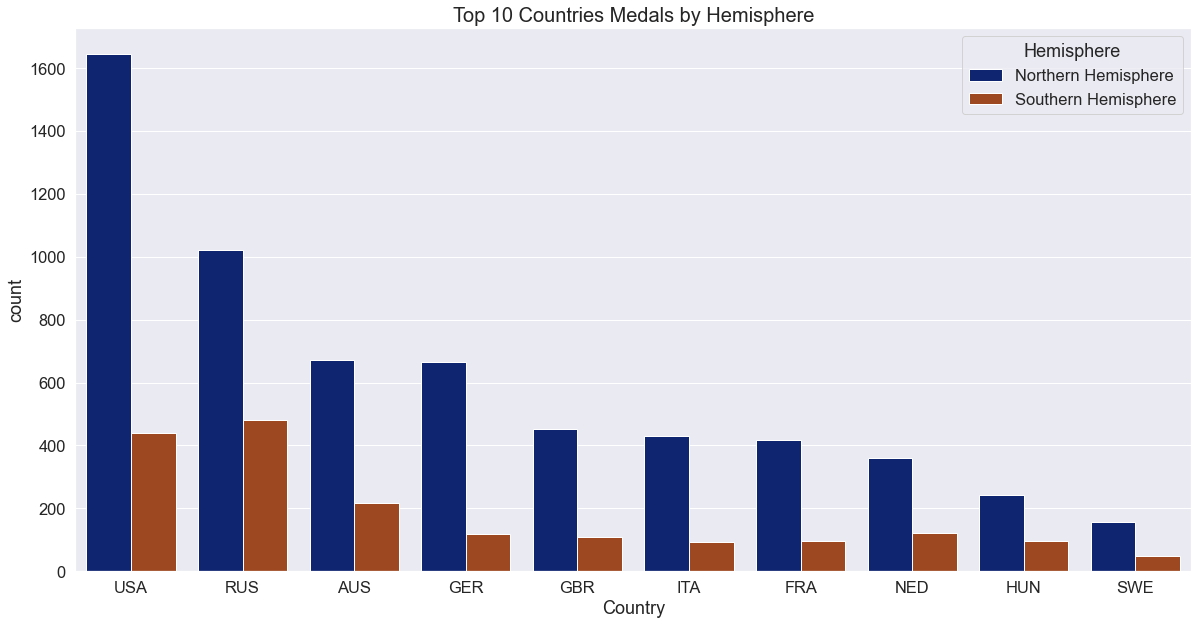

In [7]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(x='Country', data=df, hue='Hemisphere', order=top10)
plt.title("Top 10 Countries Medals by Hemisphere", fontsize = 20)

In [8]:
#Obviously this doesn't tell us interesting informations because there were more Olympics in the Northern Hemisphere
#Ce graph ne nous donne pas d'informations intéressantes car il y a eu plus de Jeux dans l'Hémisphère Nord

#Let's calcute a ratio for each Hemisphere
#Calculons plutôt un ratio pour chaque Hemisphere

In [9]:
full_df = pd.read_csv('https://raw.githubusercontent.com/SportsScience-with-RL/Olympics/main/summer_arranged.csv', index_col=0)
full_80s = full_df[full_df['Year'] >= 1980].copy()

In [10]:
potential_medals = full_80s.groupby(['City', 'Year'], as_index=False).agg({'Event':'count'})
medals_count = df.groupby(['Hemisphere', 'Country', 'City', 'Year'], as_index=False).agg({'Medal':'count'})

In [11]:
medals_count = medals_count.merge(potential_medals, how='left', left_on=['City', 'Year'],
                                  right_on=['City', 'Year'])

In [12]:
medals_count['Ratio'] = np.round(medals_count['Medal'] / medals_count['Event'], 3)
#medals_count

In [13]:
ratio_agg = medals_count.groupby(['Country', 'Hemisphere'], as_index=False).agg({'Ratio':'median'})
#ratio_agg

Text(0.5, 1.0, 'Top 10 Countries Medals Ratio by Hemisphere')

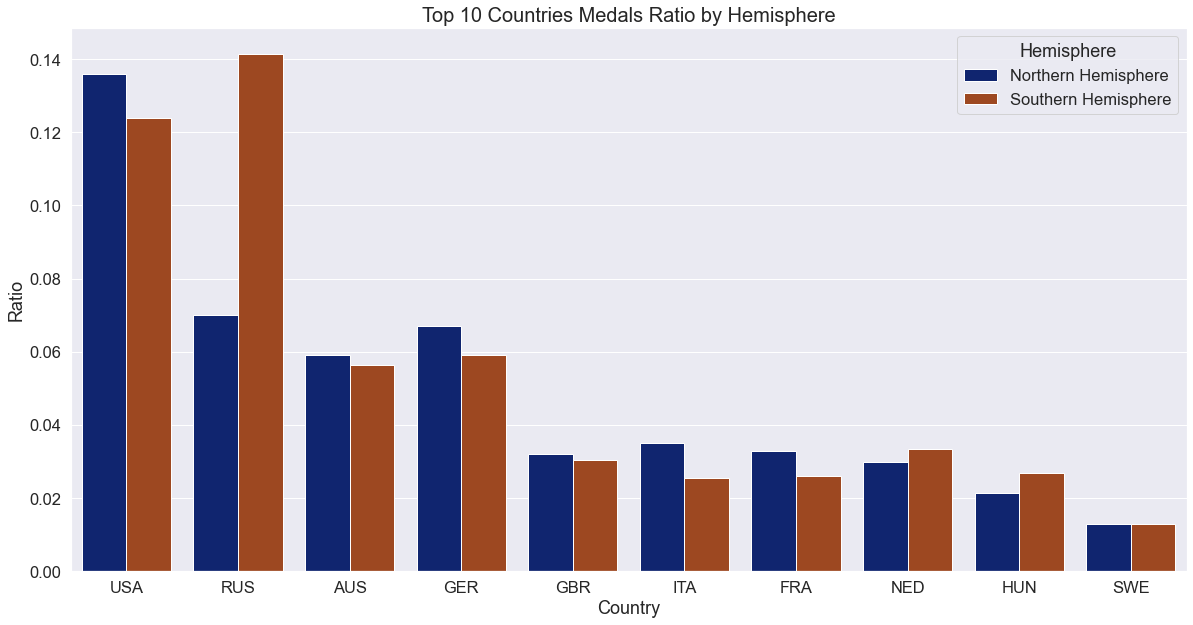

In [14]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette= "dark")
sns.barplot(x='Country', y='Ratio', data=ratio_agg, hue='Hemisphere', order=top10)
plt.title("Top 10 Countries Medals Ratio by Hemisphere", fontsize = 20)